First we want to import `pandas`, `numpy`, `matplotlib` and `seaborn`.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2,
      'axes.labelsize': 18,
      'axes.titlesize': 18,
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc) 
sns.set_style('darkgrid', rc=rc)

plt.close('all')


Now we read in the tidy one minute interval data set from tutorial 2b

In [30]:
df = pd.read_csv('130315_1_minute_intervals.csv', comment = '#')

We also grouped this `DataFrame` by genotype

In [31]:
df_grouped = df.groupby('genotype')

Defining the inactive state be defined as zero seconds of activity in a one minute period is obvious; no movement means inactive, movement means active. Defining the low activity and high activity state are not as obvious. The paper defines low activity as less than 1 second of activity in a one minute interval and high activity as 1 second or more of activity in a one minute interval. We argue that a one minute time interval is too short. We don't consider a fish that is active for one sixty-ith of our time frame to be highly active. We defined low activity as less than 3 seconds of activity in a one minute interval and high activity as 3 seconds or more of activity in a one minute interval; we consider the fish to be highly active if there it is active more than one-twenty-ith of our time frame.

In [32]:
inactive = df[df['activity'] == 0]
low_activity = df[df['activity'] <= 3]
high_activity = df[df['activity'] > 3]

Now we group the `DataFrame` of each state by genotype.

In [33]:
inactive = inactive.groupby('genotype')

low_activity = low_activity.groupby('genotype')

high_activity = high_activity.groupby('genotype')

To find out the percentage of time spent in each state we must count the number of intervals spent in each state and count the total number of intervals and then divide the first by the latter.

In [34]:
# Calculating the total number of intervals in the experiment
intervals = df_grouped['activity'].count()

# Tally of number of intervals in each state
inactive_int = inactive['activity'].count()
low_activity_int = low_activity['activity'].count()
high_activty_int = high_activity['activity'].count()

# Calculate percentages
inactive_per = inactive_int/intervals
low_activity_per = low_activity_int/intervals
high_activity_per = high_activty_int/intervals

# To see these values we will print the percentages
print(inactive_per)
print(low_activity_per)
print(high_activity_per)

genotype
het    0.248500
mut    0.189506
wt     0.248906
Name: activity, dtype: float64
genotype
het    0.613611
mut    0.559973
wt     0.585076
Name: activity, dtype: float64
genotype
het    0.386389
mut    0.440027
wt     0.414924
Name: activity, dtype: float64


Now we can plot our percentages. We chose a pie graph because it's the best way to plot percentages. Because we are plotting the percentage each genotype spends in each state we need to organize our data. We can take the 'wt' percentage we calculated seperately in each state and put them together in a list of values.

In [47]:
wt_per = [inactive_per.wt, low_activity_per.wt, high_activity_per.wt]
het_per = [inactive_per.het, low_activity_per.het, high_activity_per.het]
mut_per = [inactive_per.mut, low_activity_per.mut, high_activity_per.mut]
wt_per

[0.24890590209606125, 0.58507639490627505, 0.414923605093725]

We can now plot our pie charts.

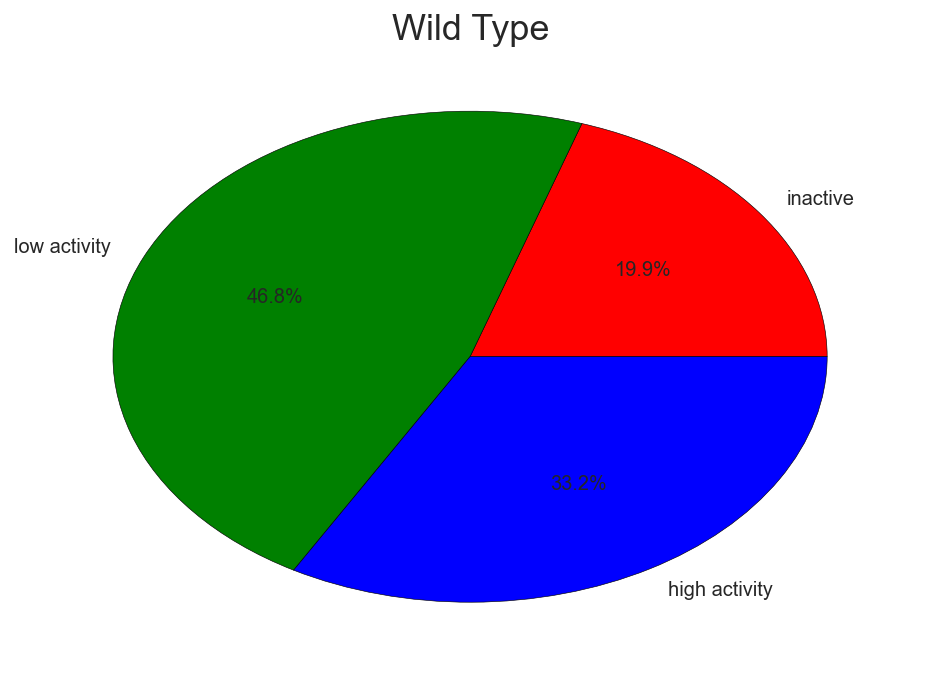

In [63]:
plt.pie(wt_per , labels = ['inactive', 'low activity', 'high activity'], colors = ['red', 'green', 'blue'], autopct='%1.1f%%')
plt.title('Wild Type')

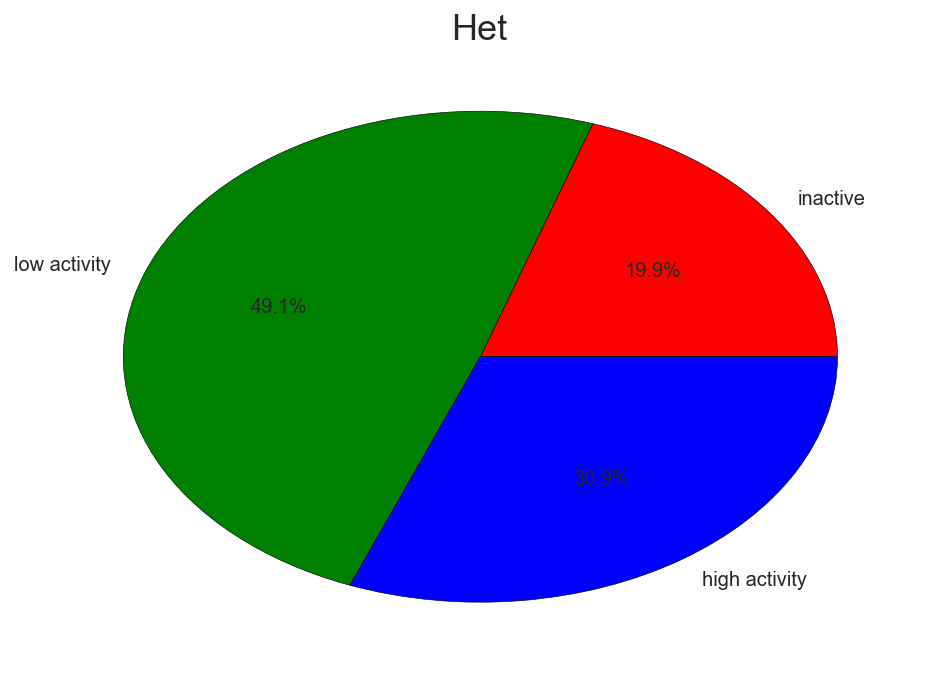

In [64]:
plt.pie(het_per, labels = ['inactive', 'low activity', 'high activity'], colors = ['red','green', 'blue'], autopct='%1.1f%%')
plt.title('Het')

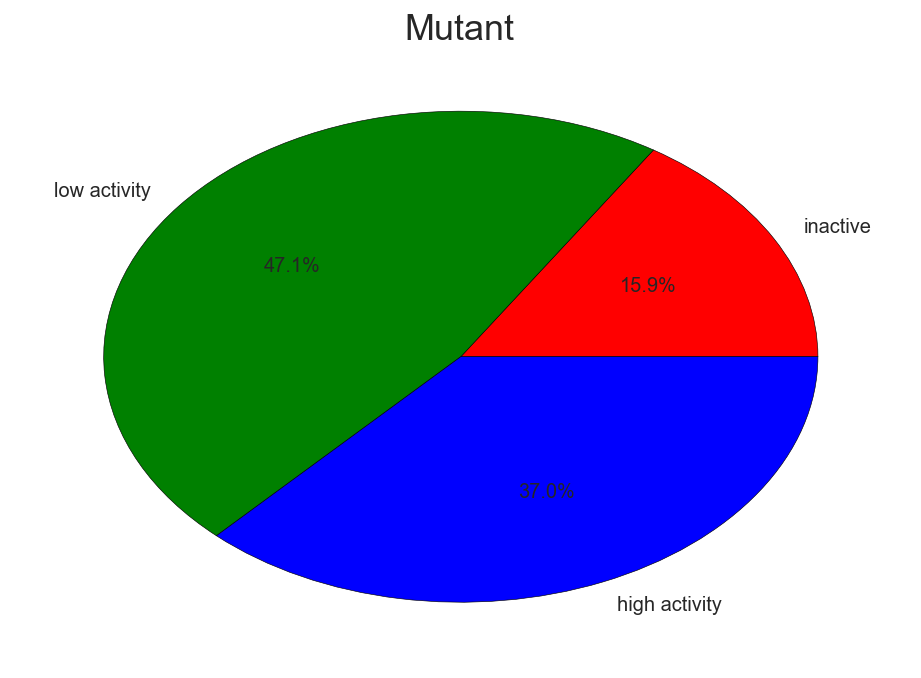

In [61]:
plt.pie(mut_per, labels = ['inactive', 'low activity', 'high activity'], colors = ['red','green', 'blue'], autopct='%1.1f%%')
plt.title('Mutant')

Some comment about the charts